In [1]:
import sklearn as sk
import sklearn.tree as tree
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
import pickle
import matplotlib.pyplot as plt 


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder



In [3]:
df = pd.read_csv('data.csv')
df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1945,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1946,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1947,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [4]:
df.drop(columns = ['Index', 'Title', 'Artist', 'Year'], inplace = True)


In [5]:
attributes = df.columns[1:]
for attribute in attributes:
    temp = df[attribute]
    for instance in range(len(temp)):
        if(type(temp[instance]) == str):
            df[attribute][instance] = float(temp[instance].replace(',',''))

In [6]:
genre = (df["Top Genre"].str.strip()).str.lower()


In [7]:
def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",1)
    for i in range(len(result)):
        if (len(result[i]) > 1):
            result[i] = [result[i][1]]
    return result.str.join('')

In [8]:
genre_m1 = genre.copy()
while(max((genre_m1.str.split(" ", 1)).str.len()) > 1):
    genre_m1 = genre_splitter(genre_m1)

In [9]:
len(genre_m1.unique())

66

In [10]:
df.isnull().any()

Top Genre                 False
Beats Per Minute (BPM)    False
Energy                    False
Danceability              False
Loudness (dB)             False
Liveness                  False
Valence                   False
Length (Duration)         False
Acousticness              False
Speechiness               False
Popularity                False
dtype: bool

In [11]:
len(df["Top Genre"].unique())

147

In [12]:
df.dtypes


Top Genre                 object
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)          int64
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

<AxesSubplot:>

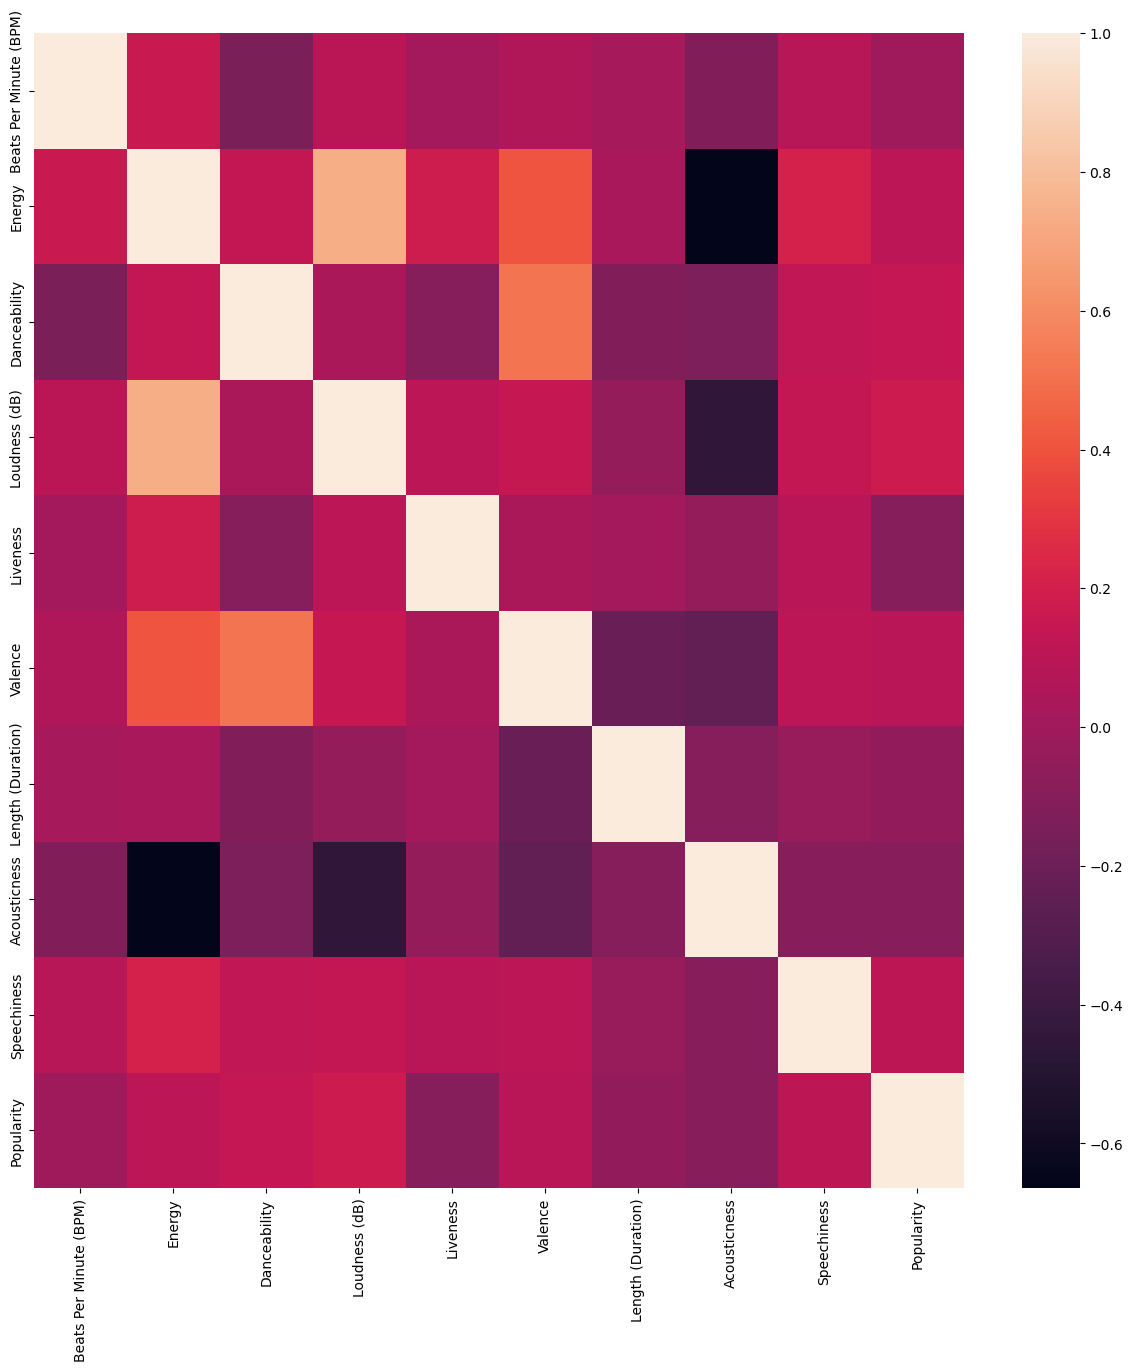

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),annot=False)

In [15]:
rs = np.random.RandomState(0)
df2 = pd.DataFrame(rs.rand(15,15))
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,-0.196089,0.203784,0.018727,-0.156373,0.084346,-0.640451,0.181295,-0.426156,0.497867,-0.163945,0.424858,-0.152443,0.033500,-0.532987
1,-0.196089,1.000000,-0.108290,0.196649,0.013398,0.080222,0.165155,0.320075,0.388931,0.003149,0.231546,-0.083411,-0.087756,0.203892,0.279335
2,0.203784,-0.108290,1.000000,0.146937,0.382497,0.485465,-0.164531,0.047017,0.411609,0.209683,0.486624,-0.163165,0.103643,-0.155193,-0.077533
3,0.018727,0.196649,0.146937,1.000000,-0.081994,0.434580,-0.311289,-0.081918,0.242641,0.034119,0.282288,-0.635867,0.436499,-0.063391,-0.311914
4,-0.156373,0.013398,0.382497,-0.081994,1.000000,0.153003,0.296359,0.330063,-0.022840,-0.113421,-0.059941,-0.170677,-0.031222,0.285531,0.086885
5,0.084346,0.080222,0.485465,0.434580,0.153003,1.000000,-0.041786,0.431274,0.177903,0.205606,0.299209,-0.298761,0.210936,-0.055975,0.017551
6,-0.640451,0.165155,-0.164531,-0.311289,0.296359,-0.041786,1.000000,0.147467,0.122486,-0.407631,0.175992,0.096224,0.350220,0.160278,0.408643
7,0.181295,0.320075,0.047017,-0.081918,0.330063,0.431274,0.147467,1.000000,-0.143710,0.084589,-0.166075,0.257590,-0.166664,-0.005355,-0.154133
8,-0.426156,0.388931,0.411609,0.242641,-0.022840,0.177903,0.122486,-0.143710,1.000000,-0.035022,0.670970,-0.446301,0.140785,-0.036256,0.132505
9,0.497867,0.003149,0.209683,0.034119,-0.113421,0.205606,-0.407631,0.084589,-0.035022,1.000000,-0.166674,0.221608,-0.030315,-0.026661,-0.098314


In [16]:
genre_m1.value_counts()

rock           836
pop            331
standards      115
metal           92
indie           77
              ... 
holler           1
electronica      1
hardcore         1
trance           1
bebop            1
Name: Top Genre, Length: 66, dtype: int64

In [17]:
df.rename(columns = {'Top Genre':'Genre'}, inplace = True)

In [18]:
df['Genre'] = genre_m1
df

,Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,standards,157,30,53,-14,11,68,201,94,3,71
1,rock,135,79,50,-11,17,81,207,17,7,39
2,hop,168,69,66,-9,7,52,341,2,17,69
3,metal,173,96,43,-4,3,37,269,0,4,76
4,rock,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...
1944,standards,94,21,70,-12,11,72,128,84,7,63
1945,standards,175,76,36,-8,76,95,136,73,6,69
1946,rock,168,80,53,-9,31,97,162,74,7,74
1947,bebop,174,26,45,-13,7,60,324,54,4,65


In [19]:
unique = genre_m1.unique()
to_remove = [] 

# genres that have a single instance only will be placed within the to_remove array
for genre in unique:
    if genre_m1.value_counts()[genre] < 20: # 10 was arbitrarily chosen
        to_remove += [genre]
len(to_remove)

55

In [20]:
df.set_index(["Genre"],drop = False, inplace = True)
for name in to_remove:
    type(name)
    df.drop(index = str(name), inplace = True)

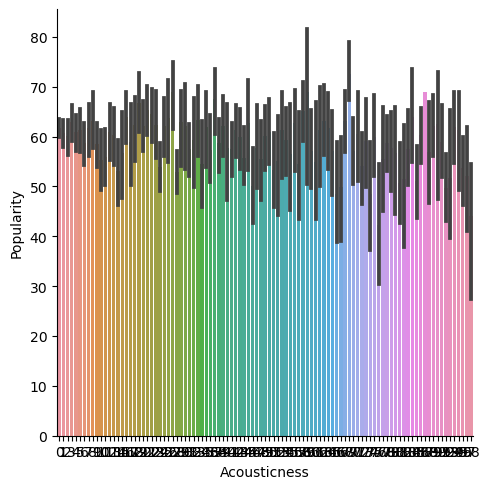

In [21]:
sns.catplot(data=df,x = 'Acousticness', y='Popularity', kind="bar")

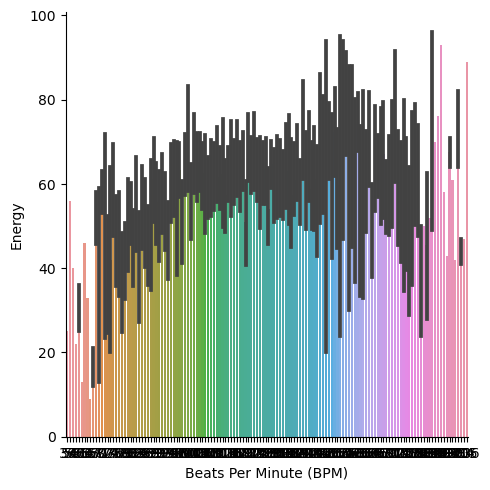

In [22]:
sns.catplot(data=df,x = 'Beats Per Minute (BPM)', y='Energy', kind="bar")

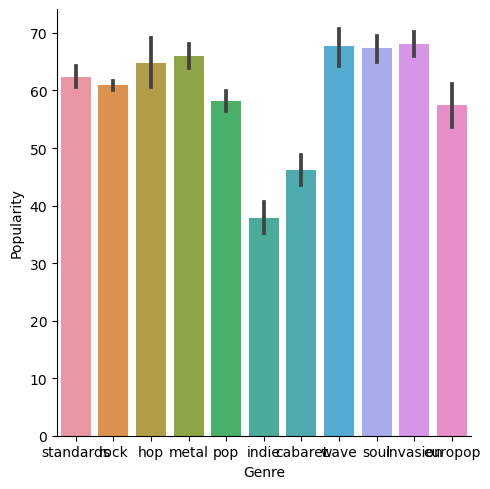

In [23]:
sns.catplot(data=df,x = 'Genre', y='Popularity', kind="bar")

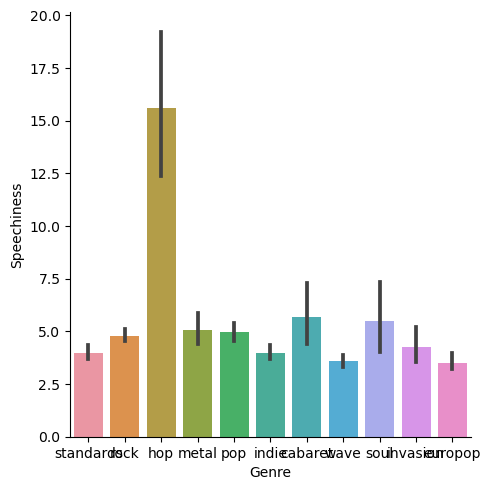

In [24]:
sns.catplot(data=df,x = 'Genre', y='Speechiness', kind="bar")

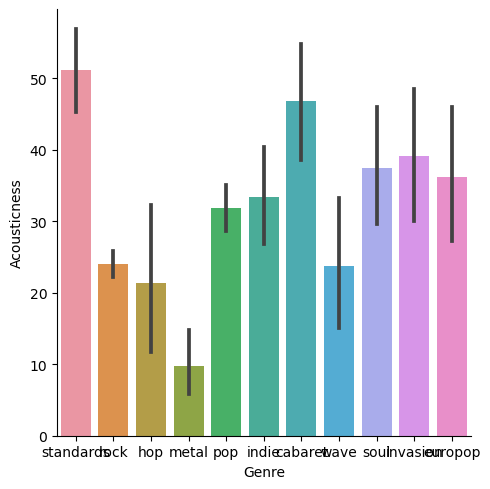

In [25]:
sns.catplot(data=df,x = 'Genre', y='Acousticness', kind="bar")

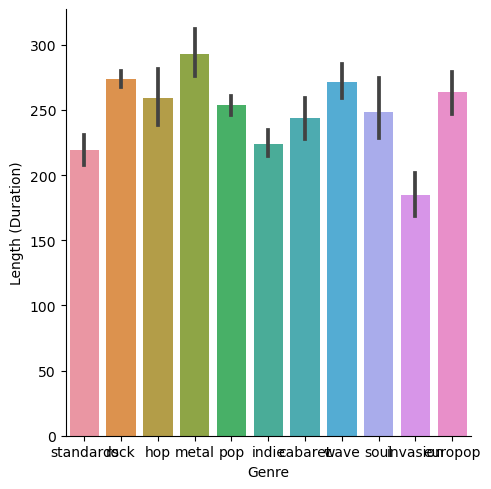

In [26]:
sns.catplot(data=df,x = 'Genre', y='Length (Duration)', kind="bar")

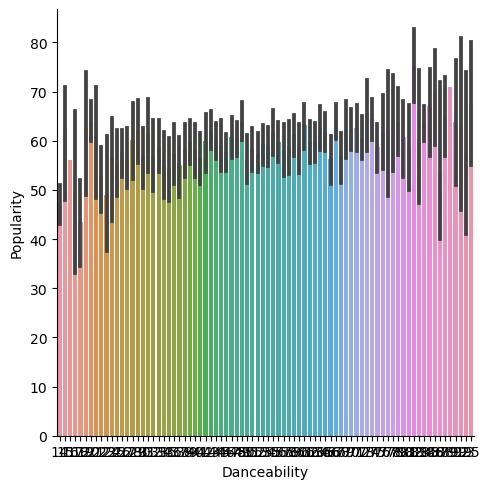

In [27]:
sns.catplot(data=df,x = 'Danceability', y='Popularity', kind="bar")

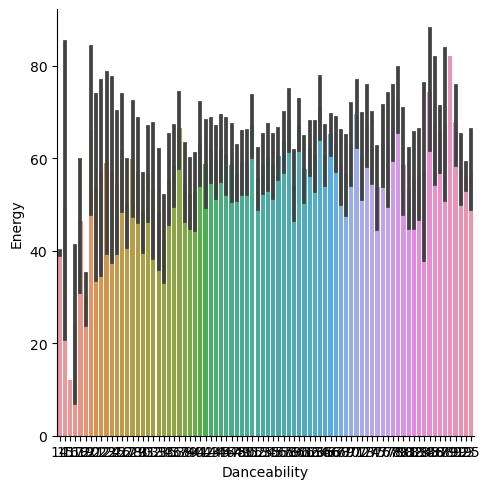

In [28]:
sns.catplot(data=df,x = 'Danceability', y='Energy', kind="bar")

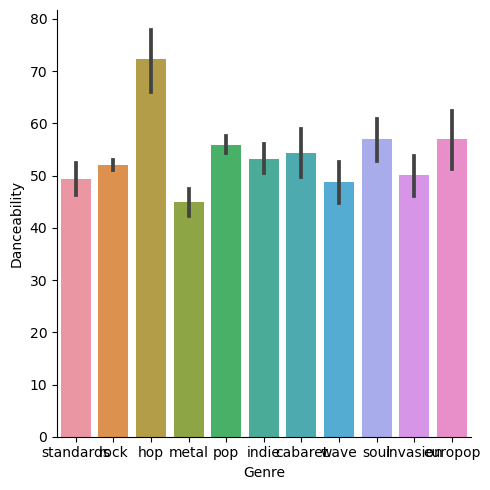

In [29]:
sns.catplot(data=df,x = 'Genre', y='Danceability', kind="bar")

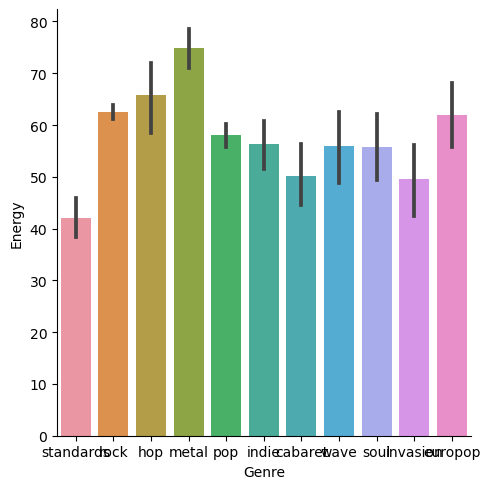

In [30]:
sns.catplot(data=df,x = 'Genre', y='Energy', kind="bar")

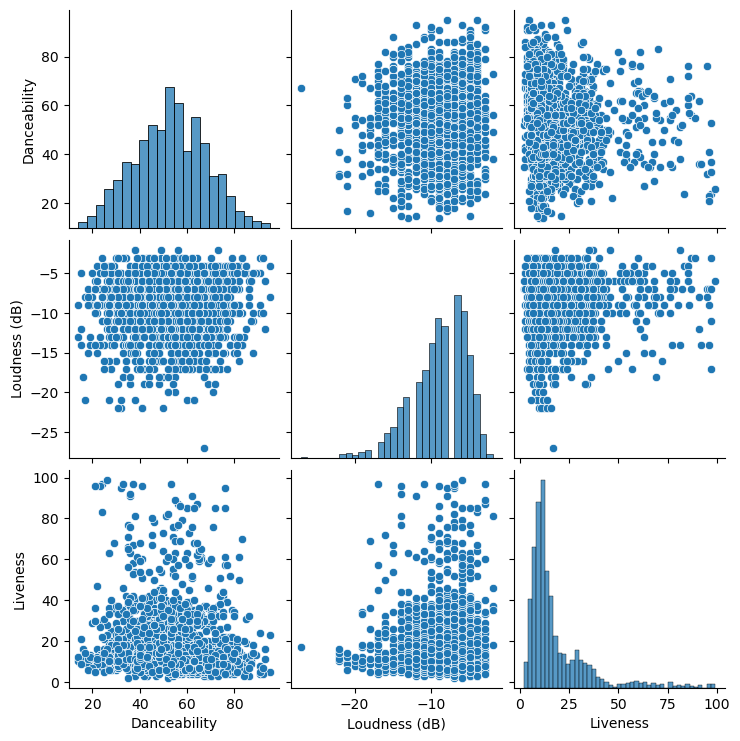

In [31]:
sns.pairplot(df[['Danceability' ,'Loudness (dB)', 'Liveness']])

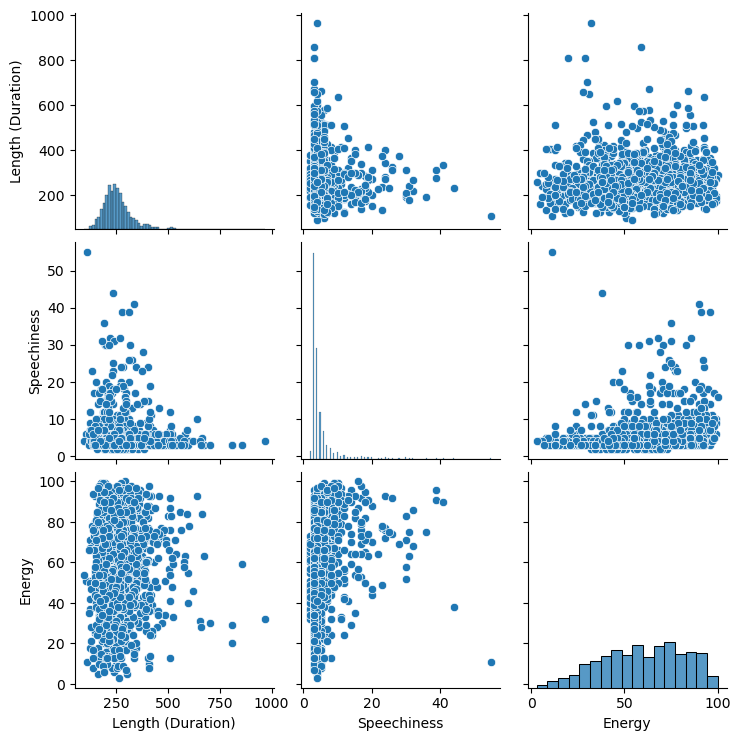

In [32]:
sns.pairplot(df[['Length (Duration)' ,'Speechiness', 'Energy']])

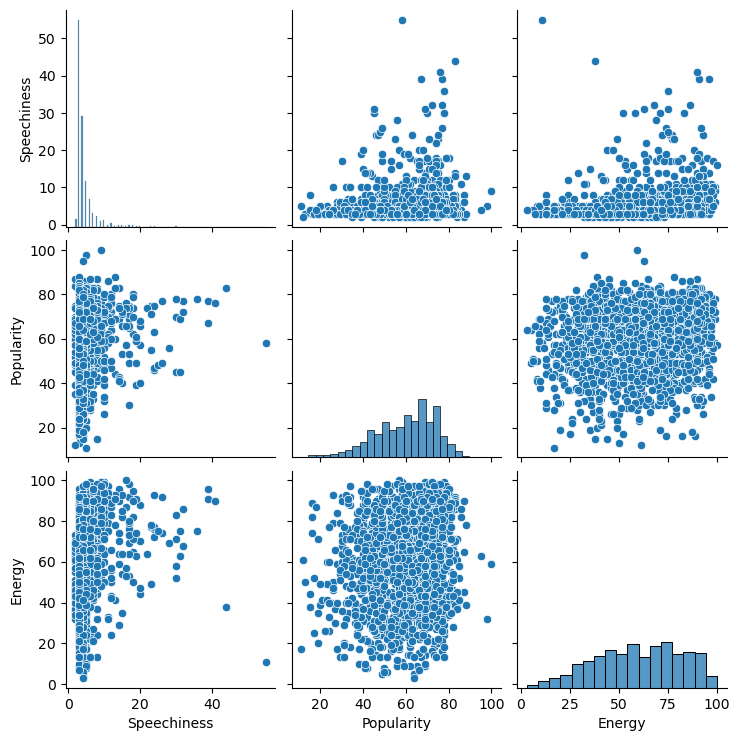

In [33]:
sns.pairplot(df[['Speechiness' ,'Popularity', 'Energy']])

In [34]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])


In [35]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Genre'], dtype='object')

In [36]:
for col in cat_df.columns:
    transform(col)

df

,Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Genre,,,,,,,,,,,
standards,9,157,30,53,-14,11,68,201,94,3,71
rock,7,135,79,50,-11,17,81,207,17,7,39
hop,2,168,69,66,-9,7,52,341,2,17,69
metal,5,173,96,43,-4,3,37,269,0,4,76
rock,7,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...
standards,9,168,7,17,-21,14,10,298,92,3,66
standards,9,94,21,70,-12,11,72,128,84,7,63
standards,9,175,76,36,-8,76,95,136,73,6,69


In [37]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [38]:
X = df.drop('Genre',axis=1)
Y = df.Genre

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.15)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15)

In [40]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train)

# Standard Scaler
X_train_ST = standard_scaler.transform(X_train)
X_test_ST = standard_scaler.transform(X_test)

In [41]:
unique = np.unique(y_train)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rand_forest = RandomForestClassifier(random_state = 42, min_samples_split = 5)
clf = LogisticRegression(multi_class = 'ovr')

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
result_ST =[]
kfold = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
RF_cross_val_score = cross_val_score(rand_forest, X_train_ST, y_train, cv = kfold, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', RF_cross_val_score.mean(), RF_cross_val_score.std()))

Random Forest: 0.500021 (0.011489)


In [44]:
kfold = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
RF_cross_val_score = cross_val_score(clf, X_train_ST, y_train, cv = kfold, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', RF_cross_val_score.mean(), RF_cross_val_score.std()))

Random Forest: 0.501646 (0.008229)
